In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 
%matplotlib inline

In [25]:
# importng data set and have a quick look to first 5 rows
df=pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#importing second cvs file which is helpful to know better each column of main cvs file
schema=pd.read_csv('survey-results-schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


The first thing that I am interested to know more about it is: how is employment status in each country. So, let's focus on "Employment Status" column in more details:

In [34]:
# no null value in Employment status column which is good for our further analysis:
df['EmploymentStatus'].isnull().sum()/df.shape[0]

0.0

In [32]:
df['EmploymentStatus'].value_counts()/df.shape[0]

Employed full-time                                      0.703378
Independent contractor, freelancer, or self-employed    0.101825
Employed part-time                                      0.061877
Not employed, and not looking for work                  0.054308
Not employed, but looking for work                      0.054211
I prefer not to say                                     0.021132
Retired                                                 0.003269
Name: EmploymentStatus, dtype: float64

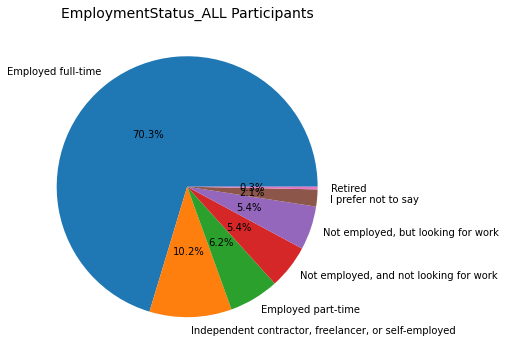

In [60]:
pie, ax = plt.subplots(figsize=[10,6])
data=df['EmploymentStatus'].value_counts()
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("EmploymentStatus_ALL Participants", fontsize=14);
plt.show()

More than 70% of participants in survey are employed right now, which is aggregate number for all participants from all countries. Specifically, I am interested to find this statistics for **USA** amd **Canada** In the first part of my first question: *I am interested to find Employment Status for USA and Canada*.

In the second part: If the "Employed" group have some specific advantage in some attributes in comparison to the "Not employed" group ?

So: here is summary of question 1:

### Question 1: What is employment status for participants from Canada and USA specifically? If there are specific parameter which help individuals to be full time employed?

In [45]:
df_Canada=df[df['Country']=='Canada']

In [47]:
df_Canada['EmploymentStatus'].value_counts()/df_Canada.shape[0]

Employed full-time                                      0.716525
Independent contractor, freelancer, or self-employed    0.093596
Not employed, but looking for work                      0.061800
Employed part-time                                      0.056426
Not employed, and not looking for work                  0.053292
I prefer not to say                                     0.011644
Retired                                                 0.006717
Name: EmploymentStatus, dtype: float64

In [48]:
df['Country'].value_counts()

United States     11455
India              5197
United Kingdom     4395
Germany            4143
Canada             2233
                  ...  
Gibraltar             1
Cape Verde            1
Saint Helena          1
Chad                  1
Monaco                1
Name: Country, Length: 201, dtype: int64

In [49]:
df_USA=df[df['Country']=='United States']

In [51]:
df_USA['EmploymentStatus'].value_counts()/df_USA.shape[0]

Employed full-time                                      0.767001
Independent contractor, freelancer, or self-employed    0.067481
Employed part-time                                      0.052204
Not employed, and not looking for work                  0.046792
Not employed, but looking for work                      0.046006
I prefer not to say                                     0.015452
Retired                                                 0.005063
Name: EmploymentStatus, dtype: float64

<Figure size 432x288 with 0 Axes>

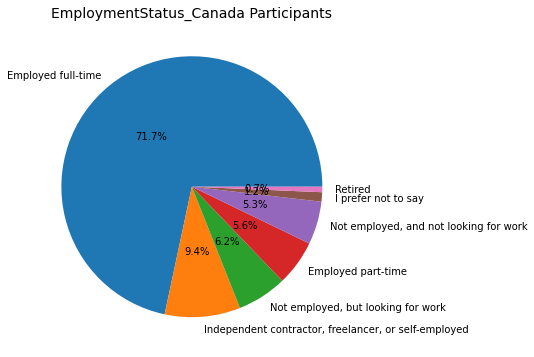

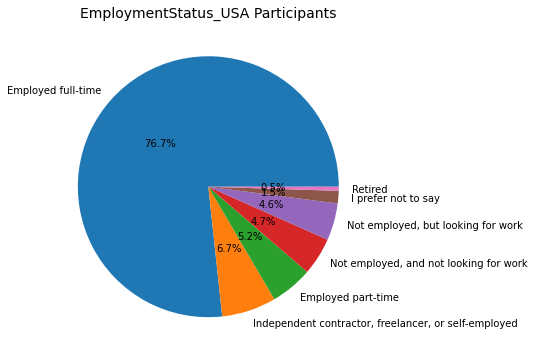

In [58]:
plt.figure(0);
pie, ax = plt.subplots(figsize=[10,6]);
data_Canada=df_Canada['EmploymentStatus'].value_counts();
labels = data_Canada.keys();
plt.pie(x=data_Canada, autopct="%.1f%%", labels=labels, pctdistance=0.5);
plt.title("EmploymentStatus_Canada Participants", fontsize=14);

plt.figure(1);
pie, ax = plt.subplots(figsize=[10,6]);
data_USA=df_USA['EmploymentStatus'].value_counts();
labels = data_USA.keys();
plt.pie(x=data_USA, autopct="%.1f%%", labels=labels, pctdistance=0.5);
plt.title("EmploymentStatus_USA Participants", fontsize=14);

plt.show();

Now, I am interested to see if there are some specific parameters which could have impact on better job market situation in USA in comparison to Canada and globally? In other words, I am interested to compare some major features of employees (such as education, major undergrad, etc.) and see if better full time employment is related to more job availability in US or it is related to quality of employees that employers are looking for ?

First, I look at **Formal Education** of the participants who have Full time job for All participants, participants from USA and participants from Canada:

In [62]:
# check to see what proportion of Formal Education column is null. Good news is No Null cell in this column.
df['FormalEducation'].isnull().sum()/df.shape[0]

0.0

In [99]:
#For all participants:
df[df['EmploymentStatus']=='Employed full-time']['FormalEducation'].value_counts()/df[df['EmploymentStatus']=='Employed full-time'].shape[0]

Bachelor's degree                                                    0.478394
Master's degree                                                      0.254675
Some college/university study without earning a bachelor's degree    0.143410
Secondary school                                                     0.058675
Doctoral degree                                                      0.030513
Professional degree                                                  0.014745
I prefer not to answer                                               0.008687
I never completed any formal education                               0.006418
Primary/elementary school                                            0.004482
Name: FormalEducation, dtype: float64

In [100]:
#Canadian Participants:
df_Canada[df_Canada['EmploymentStatus']=='Employed full-time']['FormalEducation'].value_counts()/df_Canada[df_Canada['EmploymentStatus']=='Employed full-time'].shape[0]

Bachelor's degree                                                    0.531250
Some college/university study without earning a bachelor's degree    0.247500
Master's degree                                                      0.121875
Secondary school                                                     0.051250
Doctoral degree                                                      0.019375
I prefer not to answer                                               0.011250
Professional degree                                                  0.008125
I never completed any formal education                               0.006250
Primary/elementary school                                            0.003125
Name: FormalEducation, dtype: float64

In [101]:
#USA participants:
df_USA[df_USA['EmploymentStatus']=='Employed full-time']['FormalEducation'].value_counts()/df_USA[df_USA['EmploymentStatus']=='Employed full-time'].shape[0]

Bachelor's degree                                                    0.573412
Master's degree                                                      0.188368
Some college/university study without earning a bachelor's degree    0.167425
Doctoral degree                                                      0.033121
Secondary school                                                     0.024926
Professional degree                                                  0.003642
I never completed any formal education                               0.003187
Primary/elementary school                                            0.003187
I prefer not to answer                                               0.002732
Name: FormalEducation, dtype: float64

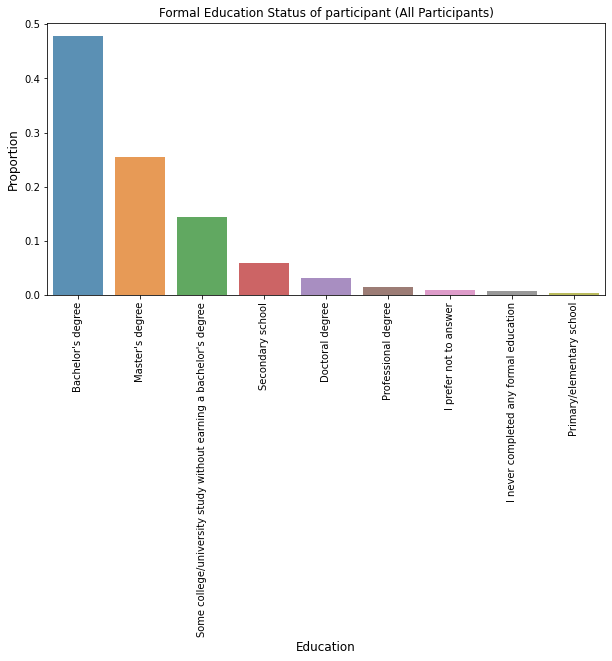

In [102]:
education_count = df[df['EmploymentStatus']=='Employed full-time']['FormalEducation'].value_counts()/df[df['EmploymentStatus']=='Employed full-time'].shape[0]
plt.figure(figsize=(10,5))
sns_barplot=sns.barplot(education_count.index, education_count.values, alpha=0.8)
plt.title('Formal Education Status of participant (All Participants)')
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Education', fontsize=12)
for item in sns_barplot.get_xticklabels():
    item.set_rotation(90)
plt.show()

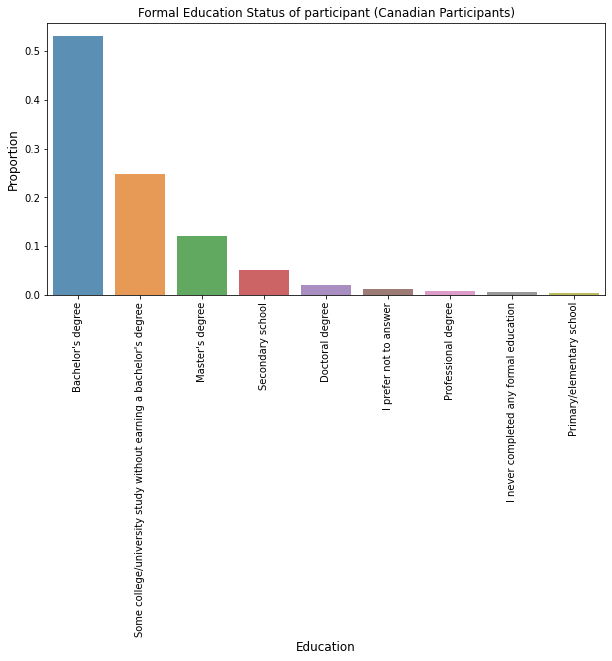

In [103]:
education_count_Canada = df_Canada[df_Canada['EmploymentStatus']=='Employed full-time']['FormalEducation'].value_counts()/df_Canada[df_Canada['EmploymentStatus']=='Employed full-time'].shape[0]
plt.figure(figsize=(10,5))
sns_barplot=sns.barplot(education_count_Canada.index, education_count_Canada.values, alpha=0.8)
plt.title('Formal Education Status of participant (Canadian Participants)')
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Education', fontsize=12)
for item in sns_barplot.get_xticklabels():
    item.set_rotation(90)
plt.show()

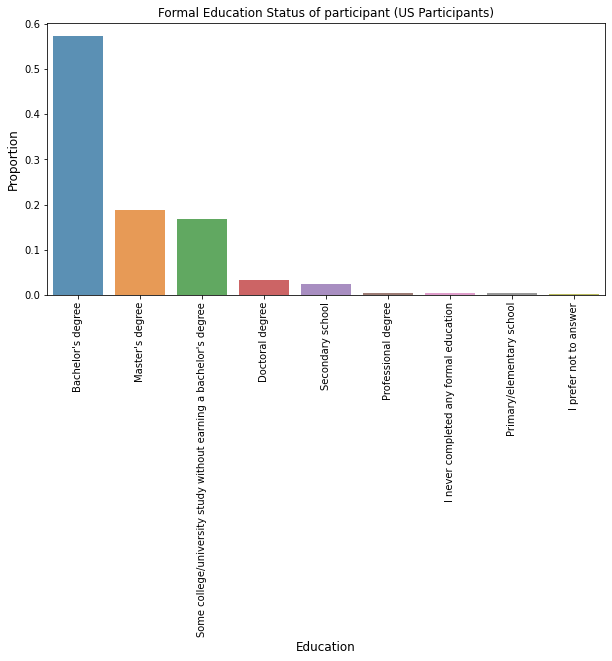

In [104]:
education_count_USA = df_USA[df_USA['EmploymentStatus']=='Employed full-time']['FormalEducation'].value_counts()/df_USA[df_USA['EmploymentStatus']=='Employed full-time'].shape[0]

plt.figure(figsize=(10,5))
sns_barplot=sns.barplot(education_count_USA.index, education_count_USA.values, alpha=0.8)
plt.title('Formal Education Status of participant (US Participants)')
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Education', fontsize=12)
for item in sns_barplot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Now, switch the gear and focus on "Major Undergrad. Like Formal Education, first look at this column in more details:

In [107]:
#Check number of null values in this column
df['MajorUndergrad'].isnull().sum()/df.shape[0]

0.16638776463262764

Almost 16% of data in this column are null. Ofcourse the best approach is to investigate in more details to see **why** these cells are null, but for this project I just remove them.

In [110]:
df_major=df.dropna(subset=['MajorUndergrad'])

In [112]:
df_major['MajorUndergrad'].isnull().sum()

0

In [113]:
df_major[df_major['EmploymentStatus']=='Employed full-time']['MajorUndergrad'].value_counts()/df_major.shape[0]

Computer science or software engineering                        0.393432
Computer engineering or electrical/electronics engineering      0.079363
Computer programming or Web development                         0.068766
Information technology, networking, or system administration    0.039051
A natural science                                               0.033449
A non-computer-focused engineering discipline                   0.032025
Mathematics or statistics                                       0.029738
Something else                                                  0.017880
A humanities discipline                                         0.016480
A business discipline                                           0.015452
Management information systems                                  0.012255
Fine arts or performing arts                                    0.011554
A social science                                                0.011321
I never declared a major                           

In [117]:
df_major_Canada=df_major[df_major['Country']=='Canada']
df_major_USA=df_major[df_major['Country']=='United States']

In [118]:
df_major_USA.shape

(10150, 154)

In [119]:
df_major_Canada[df_major_Canada['EmploymentStatus']=='Employed full-time']['MajorUndergrad'].value_counts()/df_major_Canada.shape[0]

Computer science or software engineering                        0.402529
Computer programming or Web development                         0.102213
Computer engineering or electrical/electronics engineering      0.086934
A natural science                                               0.029505
Information technology, networking, or system administration    0.025290
A non-computer-focused engineering discipline                   0.024763
Mathematics or statistics                                       0.021602
Something else                                                  0.016860
A business discipline                                           0.015806
A humanities discipline                                         0.013699
A social science                                                0.012645
Fine arts or performing arts                                    0.011064
I never declared a major                                        0.006849
Psychology                                         

In [120]:
df_major_USA[df_major_USA['EmploymentStatus']=='Employed full-time']['MajorUndergrad'].value_counts()/df_major_USA.shape[0]

Computer science or software engineering                        0.391330
Computer engineering or electrical/electronics engineering      0.077833
A natural science                                               0.044236
Computer programming or Web development                         0.039507
Mathematics or statistics                                       0.037635
A non-computer-focused engineering discipline                   0.036650
A humanities discipline                                         0.033300
Information technology, networking, or system administration    0.032217
Fine arts or performing arts                                    0.026305
A business discipline                                           0.024039
A social science                                                0.023744
Something else                                                  0.023645
Management information systems                                  0.022167
I never declared a major                           

*This is end of First Question analysis. From next coming section, I will focus on my second question. I found the column of **Career Satisfaction** in the data set and I would like to investigate in more detials to see which parameters may have impact on this.*

### Question 2: How People are happy with their Career (CareerSatisfaction in data frame)? What about Canada and USA specifically ? if there is a link between Career Satisfaction and some important parameters like: ProblemSolving, BuildingThings, LearningNewTech, JobSecurity and DiversityImportant ?
### How US participants statistics varies from global (i.e. all data)?

In [311]:
#reload the data frame to make sure we are working with original data set
df=pd.read_csv('survey_results_public.csv')

In [312]:
#drop null values in interested columns for this question
df.dropna(subset=['CareerSatisfaction','ProblemSolving','BuildingThings','LearningNewTech','BoringDetails','JobSecurity','DiversityImportant'],inplace=True)

In [327]:
#create new data frame and just include interested columns
df1=df[['Country','CareerSatisfaction','ProblemSolving','BuildingThings','LearningNewTech','JobSecurity','DiversityImportant']]

In [328]:
#Check point
df1.isnull().sum()

Country               0
CareerSatisfaction    0
ProblemSolving        0
BuildingThings        0
LearningNewTech       0
JobSecurity           0
DiversityImportant    0
dtype: int64

In [329]:
#Statistical information of all data set
(df1['CareerSatisfaction'].value_counts()).sort_index()/df1.shape[0]

0.0     0.008014
1.0     0.003737
2.0     0.011019
3.0     0.023232
4.0     0.029897
5.0     0.065534
6.0     0.107836
7.0     0.226922
8.0     0.266566
9.0     0.135036
10.0    0.122207
Name: CareerSatisfaction, dtype: float64

In [330]:
#mean of career satisfaction of all data set
df1['CareerSatisfaction'].mean()

7.348127600554785

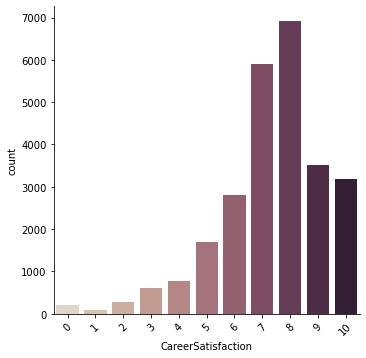

In [331]:
#bar chart of all data set
chart=sns.catplot(x="CareerSatisfaction", kind="count", palette="ch:.25", data=df1, order=np.arange(11))
chart.set_xticklabels(rotation=45);

In [332]:
#define new data frame just for US participants
df1_USA=df1[df1['Country']=='United States']

In [339]:
#define another data frame for all participants except US participants
df1_notUSA=df1[df1['Country']!='United States']

In [340]:
df1_USA['CareerSatisfaction'].mean()

7.6604006163328195

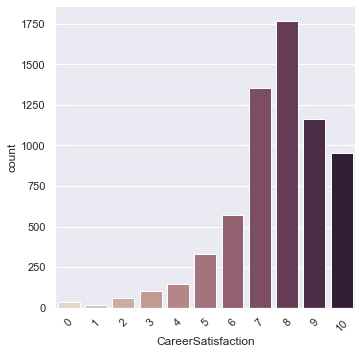

In [368]:
chart=sns.catplot(x="CareerSatisfaction", kind="count", palette="ch:.25", data=df1_USA, order=np.arange(11))
chart.set_xticklabels(rotation=45);

In [342]:
df1_notUSA['CareerSatisfaction'].mean()

7.244015206000205

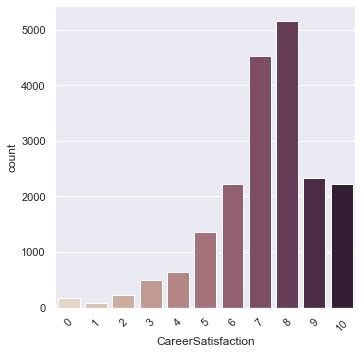

In [348]:
chart=sns.catplot(x="CareerSatisfaction", kind="count", palette="ch:.25", data=df1_notUSA, order=np.arange(11))
chart.set_xticklabels(rotation=45);

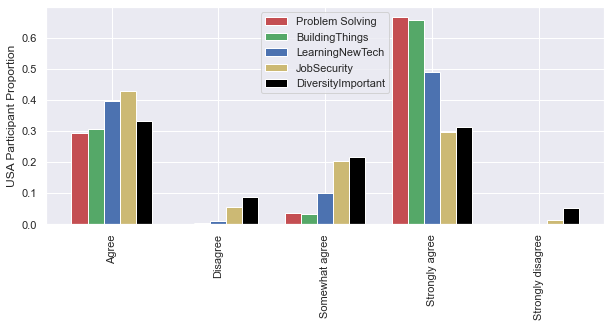

In [369]:
ind = np.arange(5)  
width = 0.15       

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = ((df1_USA['ProblemSolving'].value_counts()/df1_USA.shape[0])).sort_index().values
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = ((df1_USA['BuildingThings'].value_counts()/df1_USA.shape[0])).sort_index().values
rects2 = ax.bar(ind+width, zvals, width, color='g')

kvals = ((df1_USA['LearningNewTech'].value_counts()/df1_USA.shape[0])).sort_index().values
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

wvals = ((df1_USA['JobSecurity'].value_counts()/df1_USA.shape[0])).sort_index().values
rects4 = ax.bar(ind+width*3, wvals, width, color='y')

avals = ((df1_USA['DiversityImportant'].value_counts()/df1_USA.shape[0])).sort_index().values
rects5 = ax.bar(ind+width*4, avals, width, color='black')

ax.set_ylabel('USA Participant Proportion')
ax.set_xticks(ind+width*2)
ax.set_xticklabels( ('Agree','Disagree','Somewhat agree','Strongly agree','Strongly disagree') )
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0],rects5[0]), ('Problem Solving', 'BuildingThings', 'LearningNewTech','JobSecurity','DiversityImportant'),loc='upper center' )

plt.xticks(rotation=90)
fig.set_size_inches(10, 4)
plt.show()

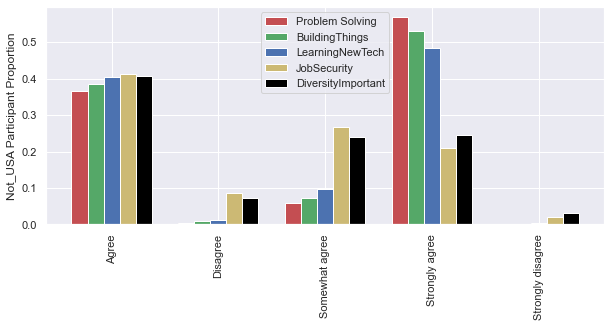

In [370]:
ind = np.arange(5)  
width = 0.15       

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = ((df1_notUSA['ProblemSolving'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = ((df1_notUSA['BuildingThings'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects2 = ax.bar(ind+width, zvals, width, color='g')

kvals = ((df1_notUSA['LearningNewTech'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

wvals = ((df1_notUSA['JobSecurity'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects4 = ax.bar(ind+width*3, wvals, width, color='y')

avals = ((df1_notUSA['DiversityImportant'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects5 = ax.bar(ind+width*4, avals, width, color='black')

ax.set_ylabel('Not_USA Participant Proportion')
ax.set_xticks(ind+width*2)
ax.set_xticklabels( ('Agree','Disagree','Somewhat agree','Strongly agree','Strongly disagree') )
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0],rects5[0]), ('Problem Solving', 'BuildingThings', 'LearningNewTech','JobSecurity','DiversityImportant'),loc='upper center' )

plt.xticks(rotation=90)
fig.set_size_inches(10, 4)
plt.show()

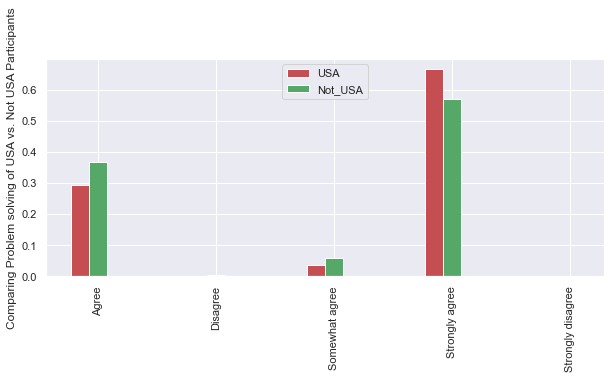

In [372]:
ind = np.arange(5)  
width = 0.15       

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = ((df1_USA['ProblemSolving'].value_counts()/df1_USA.shape[0])).sort_index().values
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = ((df1_notUSA['ProblemSolving'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Comparing Problem solving of USA vs. Not USA Participants')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Agree','Disagree','Somewhat agree','Strongly agree','Strongly disagree') )
ax.legend((rects1[0], rects2[0]), ('USA', 'Not_USA'),loc='upper center' )

plt.xticks(rotation=90)
fig.set_size_inches(10, 4)
plt.show()

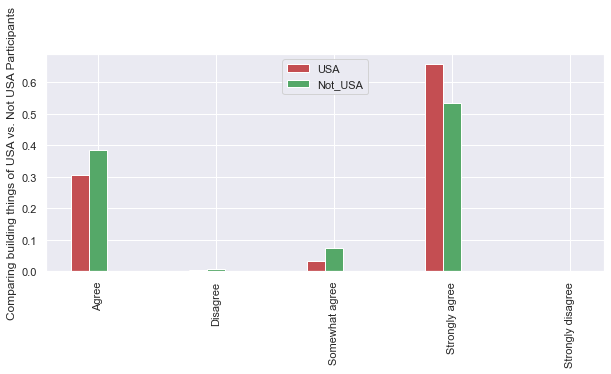

In [373]:
ind = np.arange(5)  
width = 0.15       

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = ((df1_USA['BuildingThings'].value_counts()/df1_USA.shape[0])).sort_index().values
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = ((df1_notUSA['BuildingThings'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Comparing building things of USA vs. Not USA Participants')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Agree','Disagree','Somewhat agree','Strongly agree','Strongly disagree') )
ax.legend((rects1[0], rects2[0]), ('USA', 'Not_USA'),loc='upper center' )

plt.xticks(rotation=90)
fig.set_size_inches(10, 4)
plt.show()

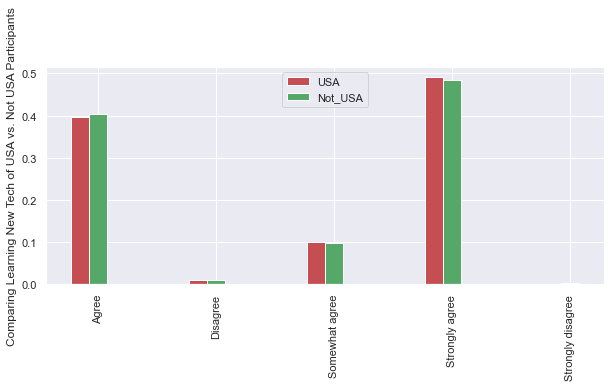

In [378]:
ind = np.arange(5)  
width = 0.15       

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = ((df1_USA['LearningNewTech'].value_counts()/df1_USA.shape[0])).sort_index().values
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = ((df1_notUSA['LearningNewTech'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Comparing Learning New Tech of USA vs. Not USA Participants')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Agree','Disagree','Somewhat agree','Strongly agree','Strongly disagree') )
ax.legend((rects1[0], rects2[0]), ('USA', 'Not_USA'),loc='upper center' )

plt.xticks(rotation=90)
fig.set_size_inches(10, 4)
plt.show()

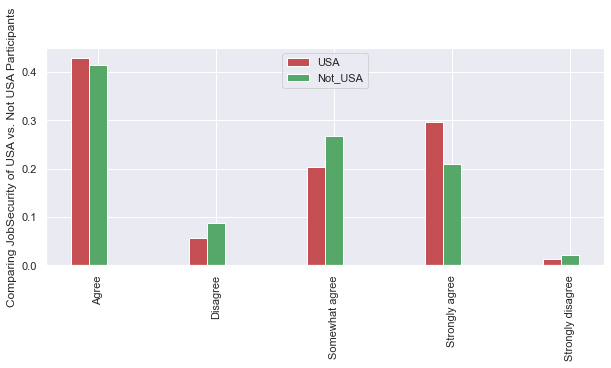

In [375]:
ind = np.arange(5)  
width = 0.15       

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = ((df1_USA['JobSecurity'].value_counts()/df1_USA.shape[0])).sort_index().values
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = ((df1_notUSA['JobSecurity'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Comparing JobSecurity of USA vs. Not USA Participants')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Agree','Disagree','Somewhat agree','Strongly agree','Strongly disagree') )
ax.legend((rects1[0], rects2[0]), ('USA', 'Not_USA'),loc='upper center' )

plt.xticks(rotation=90)
fig.set_size_inches(10, 4)
plt.show()

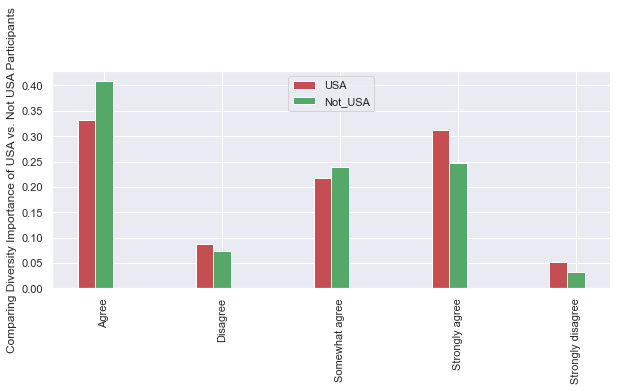

In [376]:
ind = np.arange(5)  
width = 0.15       

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = ((df1_USA['DiversityImportant'].value_counts()/df1_USA.shape[0])).sort_index().values
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = ((df1_notUSA['DiversityImportant'].value_counts()/df1_notUSA.shape[0])).sort_index().values
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Comparing Diversity Importance of USA vs. Not USA Participants')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Agree','Disagree','Somewhat agree','Strongly agree','Strongly disagree') )
ax.legend((rects1[0], rects2[0]), ('USA', 'Not_USA'),loc='upper center' )

plt.xticks(rotation=90)
fig.set_size_inches(10, 4)
plt.show()

In [300]:
#Check point
(df1['DiversityImportant'].value_counts()/df1.shape[0]).sort_index()

Agree                0.388850
Disagree             0.076630
Somewhat agree       0.234281
Strongly agree       0.263215
Strongly disagree    0.037024
Name: DiversityImportant, dtype: float64

In [294]:
#Check point
(df1['ProblemSolving'].value_counts()/df1.shape[0]).sort_index()

Agree                0.348243
Disagree             0.004199
Somewhat agree       0.053398
Strongly agree       0.592272
Strongly disagree    0.001888
Name: ProblemSolving, dtype: float64

In [308]:
#Check point
(df1['LearningNewTech'].value_counts()/df1.shape[0]).sort_index()

Agree                0.401487
Disagree             0.011558
Somewhat agree       0.098205
Strongly agree       0.485668
Strongly disagree    0.003082
Name: LearningNewTech, dtype: float64

In [309]:
#Check point
(df1['JobSecurity'].value_counts()/df1.shape[0]).sort_index()

Agree                0.417630
Disagree             0.079943
Somewhat agree       0.252350
Strongly agree       0.231430
Strongly disagree    0.018647
Name: JobSecurity, dtype: float64